In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dates = pd.date_range('20230817', periods=500)
values = np.random.randn(500)

data = pd.DataFrame({'Date': dates, 'Value': values})

# 이동평균 및 이동표준편차 계산
WINDOW_SIZE = 7

# 이동평균과 이동표준편차를 계산하기 위한 별도 변수
moving = data['Value'].rolling(window=WINDOW_SIZE)

data['MovingAverage'] = moving.mean()
data['MovingStd'] = moving.std()
print(data['MovingAverage'])
print(data['MovingStd'])

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
495   -0.357952
496   -0.286496
497   -0.453092
498   -0.369027
499   -0.358399
Name: MovingAverage, Length: 500, dtype: float64
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
495    1.142260
496    1.052619
497    1.109502
498    1.151414
499    1.165103
Name: MovingStd, Length: 500, dtype: float64


In [18]:
# 임계값 설정
threshold_multiplier = 2

# 상한에 대한 이상치, 하한에 대한 이상치
data['Threshold'] = data['MovingAverage'] + threshold_multiplier * data['MovingStd']
#data['Threshold'] = data['MovingAverage'] - threshold_multiplier * data['MovingStd']
print(data['Threshold'])

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
495    1.926568
496    1.818742
497    1.765912
498    1.933800
499    1.971808
Name: Threshold, Length: 500, dtype: float64


In [24]:
data['Outlier'] = data['Value'] > data['Threshold']
print(data['Outlier'].sum())
print(data[data['Outlier']])

3
          Date     Value  MovingAverage  MovingStd  Threshold  Outlier
32  2023-09-18  1.301186      -0.036577   0.639115   1.241653     True
47  2023-10-03  1.127141      -0.080619   0.567789   1.054959     True
416 2024-10-06  2.491930       0.168121   1.086716   2.341554     True


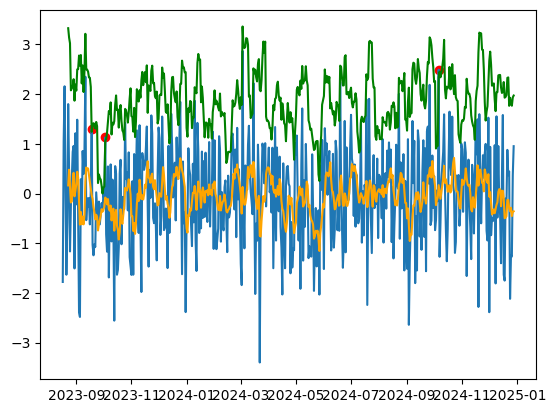

In [27]:
plt.plot(data['Date'], data['Value'])
plt.plot(data['Date'], data['Threshold'], color='green')
plt.plot(data['Date'], data['MovingAverage'], color='orange')
plt.scatter(data[data['Outlier']]['Date'], data[data['Outlier']]['Value'], color='red')
plt.show()